In [115]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [116]:
URL = "https://www.census.gov/foreign-trade/balance/c5700.html"
pd.read_html(URL)
#Data about Cricket World cup
table2021 = pd.read_html(URL)
print("There are : ",len(table2021)," tables")
print("2021 : U.S. trade in goods with China")
df2021 = table2021[0]
df2021

There are :  37  tables
2021 : U.S. trade in goods with China


,Month,Exports,Imports,Balance
0,January 2021,12860.9,39111.2,-26250.2
1,February 2021,9410.5,34027.4,-24617.0
2,March 2021,12542.3,40229.0,-27686.7
3,April 2021,11759.9,37589.8,-25829.9
4,May 2021,12411.3,38732.1,-26320.7
5,June 2021,12102.0,39946.0,-27843.9
6,July 2021,11720.0,40368.3,-28648.3
7,August 2021,11258.7,42997.3,-31738.7
8,September 2021,10910.6,47414.0,-36503.4
9,October 2021,16635.3,48032.2,-31396.8


In [117]:
URL = "https://www.census.gov/foreign-trade/balance/c5700.html"
pd.read_html(URL)
#Data about Cricket World cup
table2020 = pd.read_html(URL)
print("There are : ",len(table2020)," tables")
print("2020 : U.S. trade in goods with China")
df2020 = table2020[1]
df2020

There are :  37  tables
2020 : U.S. trade in goods with China


,Month,Exports,Imports,Balance
0,January 2020,7153.7,33173.3,-26019.6
1,February 2020,6828.4,22720.9,-15892.5
2,March 2020,7900.4,19789.1,-11888.7
3,April 2020,8624.4,30922.8,-22298.4
4,May 2020,9671.6,36551.7,-26880.0
5,June 2020,9236.6,37495.1,-28258.4
6,July 2020,9088.3,40658.0,-31569.6
7,August 2020,10961.7,40791.5,-29829.9
8,September 2020,11497.7,41194.3,-29696.6
9,October 2020,14773.1,44779.2,-30006.1


In [140]:
URL = "https://www.census.gov/foreign-trade/balance/c5700.html"
scraper = pd.read_html(URL)
for idx, table in enumerate(scraper):
    print("********************************************************")
    print(idx)
    print(table.T)

********************************************************
0
                    0              1           2           3         4  \
Month    January 2021  February 2021  March 2021  April 2021  May 2021   
Exports       12860.9         9410.5     12542.3     11759.9   12411.3   
Imports       39111.2        34027.4       40229     37589.8   38732.1   
Balance      -26250.2         -24617    -27686.7    -25829.9  -26320.7   

                 5          6            7               8             9  \
Month    June 2021  July 2021  August 2021  September 2021  October 2021   
Exports      12102      11720      11258.7         10910.6       16635.3   
Imports      39946    40368.3      42997.3           47414       48032.2   
Balance   -27843.9   -28648.3     -31738.7        -36503.4      -31396.8   

                    10          11  
Month    November 2021  TOTAL 2021  
Exports          16069      137680  
Imports          48385      456832  
Balance         -32316     -319152  
****

In [142]:
df2021 = scraper[0]
df2020 = scraper[1]
df2019 = scraper[2]
df2018 = scraper[3]
df2017 = scraper[4]
df2016 = scraper[5]
df2015 = scraper[6]
df2014 = scraper[7]
df2013 = scraper[8]
df2012 = scraper[9]



In [143]:
df1 = [df2021,df2020, df2019, df2018,df2017,df2016,df2015,df2014,df2013,df2012] # combine 10 years' tables
total = pd.concat(df1)
total_all = total[total['Month'].str.contains('TOTAL')] # extract the rows about the total trade
t1 = total_all.rename(columns = {'Month':'Year'}) # rename column 
t1


,Year,Exports,Imports,Balance
11,TOTAL 2021,137680.5,456832.2,-319151.7
12,TOTAL 2020,124485.4,434749.0,-310263.5
12,TOTAL 2019,106448.4,450760.4,-344312.0
12,TOTAL 2018,120281.2,538514.2,-418232.9
12,TOTAL 2017,129997.2,505165.1,-375167.9
12,TOTAL 2016,115594.8,462420.0,-346825.2
12,TOTAL 2015,115873.4,483201.7,-367328.3
12,TOTAL 2014,123657.2,468474.9,-344817.7
12,TOTAL 2013,121746.2,440430.0,-318683.8
12,TOTAL 2012,110516.6,425619.1,-315102.5


In [144]:
t1.describe()

,Exports,Imports,Balance
count,10.000000,10.000000,10.000000
mean,120628.090000,466616.660000,-345988.550000
std,9160.523294,34449.016318,33709.445377
min,106448.400000,425619.100000,-418232.900000
25%,115664.450000,443012.600000,-362202.525000
50%,121013.700000,459626.100000,-344564.850000
75%,124278.350000,479520.000000,-318800.775000
max,137680.500000,538514.200000,-310263.500000


In [ ]:
t1['Year'].str.replace('[TOTAL]','')

In [178]:
t1['Year'] = t1['Year'].str.replace('[TOTAL]','')
t1.at[11,'Imports'] = 456832.2+39530  # count 11 (actual) + Dec estimatet

In [179]:
T = total_view.sort_values(by = 'Year', ascending = True)
total_view = T.reset_index()

In [181]:
Total = total_view.drop(['index', 'level_0'], axis = 1)
Total

,Year,Exports,Imports,Balance
0,2012,110516.6,425619.1,-315102.5
1,2013,121746.2,440430.0,-318683.8
2,2014,123657.2,468474.9,-344817.7
3,2015,115873.4,483201.7,-367328.3
4,2016,115594.8,462420.0,-346825.2
5,2017,129997.2,505165.1,-375167.9
6,2018,120281.2,538514.2,-418232.9
7,2019,106448.4,450760.4,-344312.0
8,2020,124485.4,434749.0,-310263.5
9,2021,137680.5,496362.2,-319151.7


In [153]:
t1.dtypes

Year        object
Exports    float64
Imports    float64
Balance    float64
dtype: object

In [149]:
Dec = total[total['Month'].str.contains('December')] # extract the rows about the total trade
Dec_total = Dec.reset_index()
Dec_total

,index,Month,Exports,Imports,Balance
0,11,December 2020,14529.6,41833.7,-27304.1
1,11,December 2019,8899.0,33586.2,-24687.1
2,11,December 2018,9210.2,45814.9,-36604.6
3,11,December 2017,13629.9,44439.4,-30809.5
4,11,December 2016,11644.8,39358.9,-27714.1
5,11,December 2015,10091.1,37981.0,-27889.9
6,11,December 2014,12175.2,40395.9,-28220.7
7,11,December 2013,12988.7,37500.2,-24511.6
8,11,December 2012,10308.6,34857.6,-24548.9


In [125]:
Dec_total.describe()# import mean is around 39530

,index,Exports,Imports,Balance
count,9.0,9.000000,9.000000,9.000000
mean,11.0,11497.455556,39529.755556,-28032.277778
std,0.0,1994.392134,4083.011094,3834.126905
min,11.0,8899.000000,33586.200000,-36604.600000
25%,11.0,10091.100000,37500.200000,-28220.700000
50%,11.0,11644.800000,39358.900000,-27714.100000
75%,11.0,12988.700000,41833.700000,-24687.100000
max,11.0,14529.600000,45814.900000,-24511.600000


### Visualization

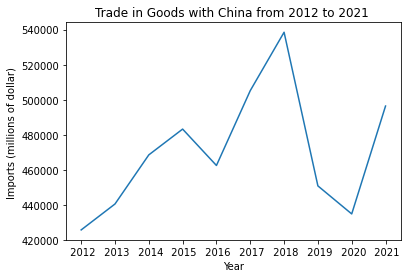

In [182]:
import matplotlib.pyplot as plt
plt.plot(Total.Year, Total.Imports)
plt.title('Trade in Goods with China from 2012 to 2021 ')
plt.xlabel('Year')
plt.ylabel('Imports (millions of dollar) ')
plt.show()

### research dig in direction
1. product type /total import from China
https://tradingeconomics.com/united-states/imports/china